<a href="https://colab.research.google.com/github/StepDaria/Yandex_final_project/blob/main/%D0%AF%D0%9F_%D1%84%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='steelblue' size=5><b>Комментарий тимлида</b></font>

<font color='steelblue'>Привет, Дарья! Это Ольга Васильева. Мы делаем очень классный проект, давай смотреть, что получилось)
    
<font color='steelblue'>Я буду использовать различные цвета и знаки, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='steelblue'>синий текст - просто текст комментария</font>

<font color='green'> ✔️зеленый текст - все отлично</font>

<font color='darkorange'>⚠️оранжевый текст - есть рекомендации, на что стоит обратить внимание</font>

<font color='crimson'> ❌красный текст - есть недочеты</font>

<font color='Salmon' size=5><b>Комментарий студента</b></font>

Привет! Спасибо за ревью. Поправила путь, теперь должно работать

# **Проект - промышленность**

Чтобы оптимизировать производственные расходы, металлургический комбинат решил уменьшить потребление электроэнергии на этапе обработки стали. Нужно построить модель, которая предскажет температуру стали.

Имеем дело с задачей регрессии

<font color='steelblue'><b>Комментарий тимлида</b></font><br>
<font color='green'> ✔️ Описание на месте, я бы его несколько расширила.</font>

# План работы

1. EDA - смотрим на данные, определяем, на каких объектах (ключах) можем обучать модель, опредлеяем выбросы
2. Feature engineering - разные подходы к агрегации по ключам, генерация новых признаков
3. Model validation - пробуем разные модели (регрессия лассо-ридж, бустинг, леса). Паралелльно смотрим на важность признаков, удаляем шумные признаки
4. Observing - оцениваем адекватность моделей (в том числе на утечку данных и на сравнение с константными моделями). Если все плохо, возвращаемся к пункту 2
4. Model testing - тестируем выбранную модель, проверяем ее качество

<font color='steelblue'><b>Комментарий тимлида</b></font><br>
<font color='green'> ✔️ Хороший план.</font>

# Part 1

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/datasets/final_steel/'

In [ ]:
def read_file(path):
    data = pd.read_csv(path)
    display(data.head())
    display(data.info())
    display(data.describe())
    return data

def count_keys(data, key_set):
    """
    Выводит количество записей по ключам и возвращает сет ключей, для которых есть записи
    """
    if key_set:
        key_set.intersection_update(set(data['key'].unique()))
    else:
        key_set.update(set(data['key'].unique()))
    print('Количество уникальных ключей в таблице:', data['key'].nunique())
    print('Размер множества ключей, для которых есть записи во всех таблицах:', len(key_set))
    return key_set

### data_arc

In [ ]:
data_arc = read_file(path + 'data_arc.csv')

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


In [ ]:
key_set = count_keys(data_arc, set())

Количество уникальных ключей в таблице: 3214
Размер множества ключей, для которых есть записи во всех таблицах: 3214


Получили записи для 3214 ключей

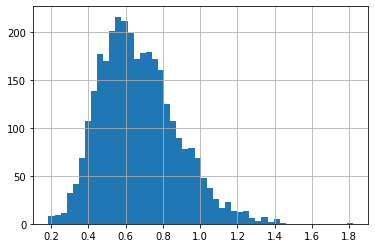

In [ ]:
# смотрим на гистограмму усредленных по ключу значений активных мощностей
data_arc.groupby(['key'])['Активная мощность'].mean().hist(bins=50)

Выглядит во всех смыслах нормально

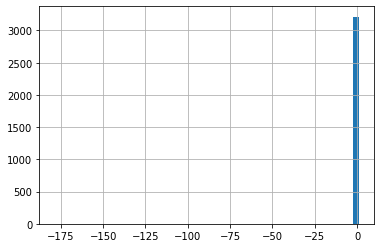

In [ ]:
# смотрим на гистограмму усредленных по ключу значений Реактивных мощностей
data_arc.groupby(['key'])['Реактивная мощность'].mean().hist(bins=50)

Есть выбросы, изучим их

In [ ]:
data_arc[data_arc['Реактивная мощность'] < -1]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


Посмотрим на наличие других записей для этого ключа

In [ ]:
data_arc[data_arc['key'] == 2116]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


Поскольку есть другие записи для этого ключа - то просто удалим строчку с выбросом

In [ ]:
data_arc = data_arc.drop(9780, axis=0)

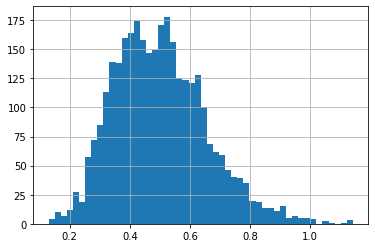

In [ ]:
# смотрим на гистограмму усредленных по ключу значений Реактивных мощностей
data_arc.groupby(['key'])['Реактивная мощность'].mean().hist(bins=50)

Теперь распределение выглядит окей

<font color='steelblue'><b>Комментарий тимлида</b></font><br>
<font color='green'> ✔️ Хорошо.</font>

### Вопросы

Активная и реактивная мощность в одних и тех же единицах измерения?

<font color='steelblue'><b>Комментарий тимлида</b><br>
Нет, они имеют разные единицы измерения, активная измеряется в Ватт, реактивная в Вольт-Ампер реактивных.</font>

### data_bulk

In [ ]:
data_bulk = read_file(path + 'data_bulk.csv')

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [ ]:
key_set = count_keys(data_bulk, key_set)

Количество уникальных ключей в таблице: 3129
Размер множества ключей, для которых есть записи во всех таблицах: 3128


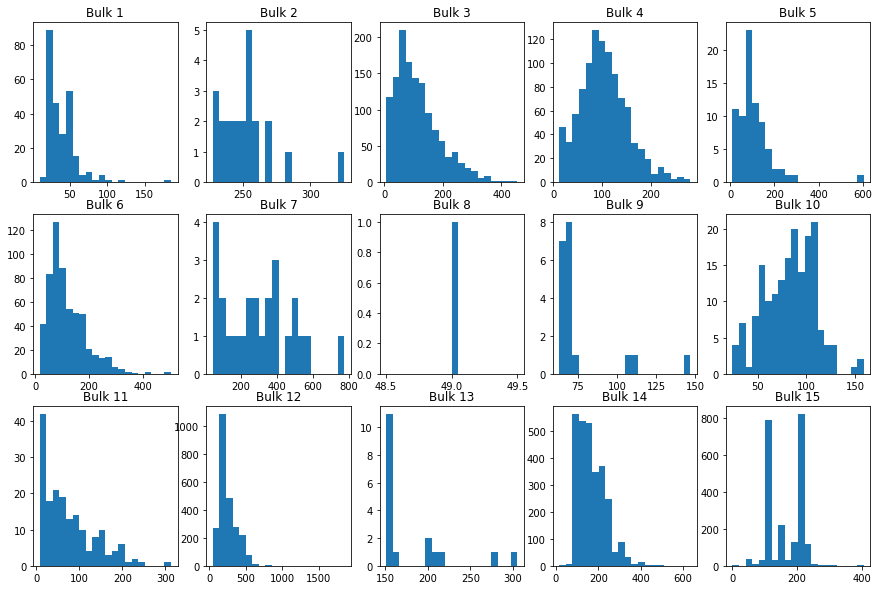

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
for i in range(15):
    axes[i // 5][i % 5].hist(data_bulk[f'Bulk {i + 1}'], bins=20)
    axes[i // 5][i % 5].title.set_text(f'Bulk {i + 1}')

Все выглядит более-менее прилично. Bulk 8 добявлялся ровно один раз, так что он не константный 



<font color='steelblue'><b>Комментарий тимлида</b></font><br>
<font color='green'> ✔️ Всё верно.</font>

### Вопросы

Пропуски обозначают, что добавку не добавляли

Объемы в одних единицах измерения?

Не для всех ключей имеются записи в таблице. Что делать с ключами, для которых нет записей в таблице data_bulk? Удалять/считать, что к ним ничего не добавлялось?

<font color='steelblue'><b>Комментарий тимлида</b><br>
1. Да
2. Да, в кубических сантиметрах.
3. Если ключей нет, считаем данные потерянными. Мы можем использовать только те ключи, которые есть во всех таблицах.</font>

### data_bulk_time

In [ ]:
data_bulk_time = read_file(path + 'data_bulk_time.csv')

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [ ]:
key_set = count_keys(data_bulk_time, key_set)

Количество уникальных ключей в таблице: 3129
Размер множества ключей, для которых есть записи во всех таблицах: 3128


In [ ]:
# Посчитаем количество несовпадающих пропусков в таблицах data_bulk и data_bulk_time
(~(data_bulk.isna() == data_bulk_time.isna())).sum()

key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

Все пропуски соответсствуют друг другу в двух таблицах

<font color='steelblue'><b>Комментарий тимлида</b></font><br>
<font color='green'> ✔️ Хорошо.</font>

### Вопросы

Эта таблица нужна, чтоб мы понимали последовательность добавления добавок?

<font color='steelblue'><b>Комментарий тимлида</b><br>
Нет, имеются некоторые сложности с синхронностью снятия времени с разных датчиков, эта таблица нужна для проверки адекватности данных, например, чтобы проверить, что нет наблюдений из другого года.</font>

### data_gas


In [ ]:
data_gas = read_file(path + 'data_gas.csv')

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


<font color='steelblue'><b>Комментарий тимлида</b></font><br>
<font color='crimson'> ❌ Пожалуйста, поправь пути, чтобы я могла дальше проверить твой проект.</font>

<font color='Salmon'><b>Комментарий студента</b></font>

Поправила путь, теперь должно работать

<font color='steelblue'><b>Комментарий тимлида v2</b></font><br>
<font color='green'> ✔️ 👍🏼</font>

In [ ]:
key_set = count_keys(data_gas, key_set)

Количество уникальных ключей в таблице: 3239
Размер множества ключей, для которых есть записи во всех таблицах: 3126


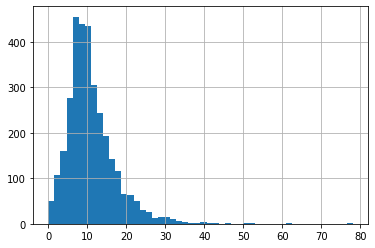

In [ ]:
data_gas['Газ 1'].hist(bins=50)

 Распределение с правым хвостом

<font color='steelblue'><b>Комментарий тимлида v2</b></font><br>
<font color='green'> ✔️ Согласна.</font>

### Вопросы


Что означает столбец? Это время продувки/объем/масса газа?

<font color='steelblue'><b>Комментарий тимлида v2</b><br>
Объем газа.</font>

### data_temp

In [ ]:
data_temp = read_file(path + 'data_temp.csv')

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [ ]:
key_set = count_keys(data_temp, key_set)

Количество уникальных ключей в таблице: 3216
Размер множества ключей, для которых есть записи во всех таблицах: 3126


Записи в таблице есть только для 3216 ключей 

In [ ]:
# проверим, для есть ли ключи, для которых все значения температуры пустые
(data_temp.groupby(['key'])['Температура'].count() == 0).sum()

0

Таких ключей нет

 Есть ключи с низкими значениями температуры

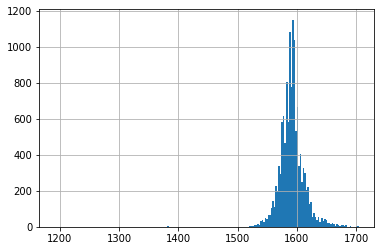

In [ ]:
data_temp['Температура'].hist(bins=200)

<font color='Salmon'><b>Комментарий студента</b></font>

Из семинара неясно, что значит "низкие температуры". Как мне кажется, есть 2 подхода для определения пороговой температуры: 

1) Чисто визуально "низкие" - это те температуры, которые меньше 1500 градусов, т.е. порог - 1500 градусов

2) Можно применить грубый 3-сигма критерий, чтобы определить пороговую температуру

<font color='steelblue'><b>Комментарий тимлида v3</b><br>
Мы можем удалить ключи, у которых одна из двух температур ниже 1500 градусов.</font>

**Визуальный подход**

In [ ]:
data_temp[data_temp['Температура'] < 1500]

,key,Время замера,Температура
4350,867,2019-06-04 14:21:00,1191.0
5978,1214,2019-06-16 05:32:00,1208.0
7958,1619,2019-06-30 11:03:54,1218.0
8913,1818,2019-07-07 00:30:49,1383.0
8914,1818,2019-07-07 00:31:40,1383.0
10127,2052,2019-07-21 14:51:40,1227.0
12564,2561,2019-08-08 07:34:15,1204.0


6 ключей с низкими темепартурами

**3 сигма подход**

In [ ]:
min_temp = data_temp['Температура'].mean() - 3 * data_temp['Температура'].std()
min_temp

1527.7133657667073

In [ ]:
data_temp[data_temp['Температура'] < min_temp]

,key,Время замера,Температура
502,88,2019-05-06 11:28:10,1526.0
2675,512,2019-05-22 11:08:02,1520.0
4350,867,2019-06-04 14:21:00,1191.0
4561,908,2019-06-05 19:56:25,1520.0
5978,1214,2019-06-16 05:32:00,1208.0
6913,1400,2019-06-22 20:33:52,1527.0
7388,1503,2019-06-26 12:37:20,1525.0
7389,1503,2019-06-26 12:50:52,1525.0
7958,1619,2019-06-30 11:03:54,1218.0
8206,1671,2019-07-02 00:28:59,1519.0


16 ключей с низкими температурами

Как по мне подход визаульный дает найти действительно далеко отстоящие выбросы, в то время как 3-сигма предлагает не рассматривать пороговые значения 

In [ ]:
key_set = key_set - set(data_temp[data_temp['Температура'] < 1500]['key'])
len(key_set)

3121

Убрали из сета ключи с низкими температруами (ниже 1500) 

<font color='steelblue'><b>Комментарий тимлида v2</b></font><br>
<font color='crimson'> ❌ Тут ты смотришь не ключи, у которых есть низкие температуры, а ключи, у которых среднее значение температуры ниже 1500.</font>

<font color='Salmon'><b>Комментарий студента</b></font>

Поправила выше

**Убираем ключи, для которых нет первого и последнего замера темепартуры**

In [ ]:
# посмотрим на количество записей по колонкам
key_set = key_set - set(data_temp.dropna().groupby('key').last()[~(data_temp.dropna().groupby('key').last()['Время замера'] 
                                           == data_temp.groupby('key').last()['Время замера'])].index)
len(key_set)

2401

Видим, что есть ключи, для которых количество измерений температуры равно единице

In [ ]:
# оставляем ключи, для которых число замеров строго больше одного
# key_set = set(data_temp.groupby('key').count()[data_temp.groupby('key').count()['Температура'] > 1].index)
# len(key_set)

### Вопросы
Есть пропуски в данных

Что означают пропуски? Не проводились измерения/реальное значение температуры лежало за границей пределов измерения прибора? Что с ними можно сделать?

Что делать с выбросом? Его хочется удалить

<font color='steelblue'><b>Комментарий тимлида v2</b><br>
Вероятно, заказчик удадил часть наблюдений, чтобы потом проверить качество модели, так получились пропуски. На вебинаре я говорила, что ключи с низкими значениями температур можно удалить. Так же я говорила, что нужно взять только те ключи, у которых есть первый и последний замеры температуры, рекомендую вебинар к просмотру.</font>

<font color='Salmon'><b>Комментарий студента</b></font>

Пересмотрела вебинар, постаралась все сделать в соответсвие с требованиями, получилось, что работаем с 2475 ключами

<font color='steelblue'><b>Комментарий тимлида v3</b><br>
2475 ключей у температуры, потом их станет меньше, так как мы можем использовать только те ключи, которые есть во всех датафреймах.</font>

### data_wire

In [ ]:
data_wire = read_file(path + 'data_wire.csv')

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [ ]:
key_set = count_keys(data_wire, key_set)

Количество уникальных ключей в таблице: 3081
Размер множества ключей, для которых есть записи во всех таблицах: 2325


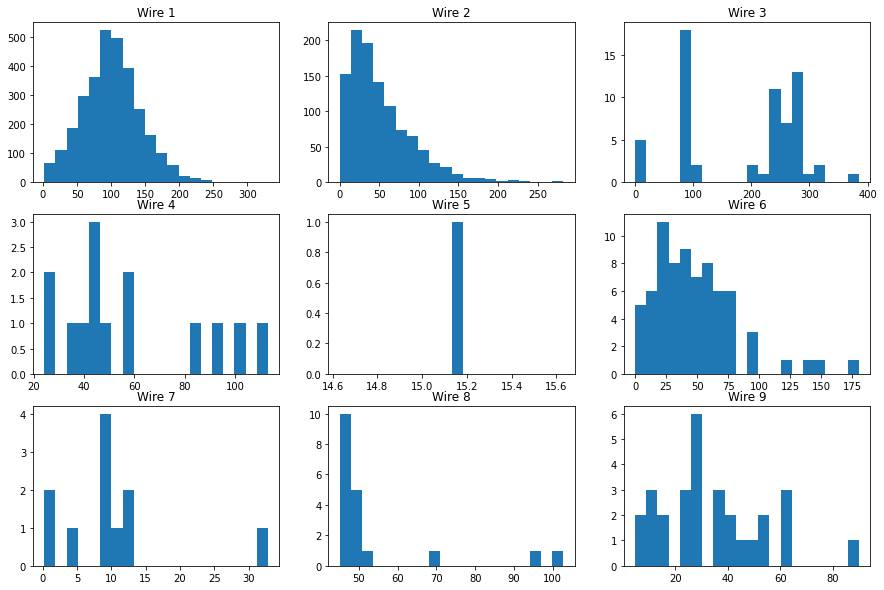

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
fig
for i in range(9):
    axes[i // 3][i % 3].hist(data_wire[f'Wire {i + 1}'], bins=20)
    axes[i // 3][i % 3].title.set_text(f'Wire {i + 1}')

Wire 5 не константный, он просто только один раз прибавлялся

<font color='steelblue'><b>Комментарий тимлида v2</b></font><br>
<font color='green'> ✔️ Согласна.</font>

In [ ]:
(data_wire.groupby('key').count().sum(axis=1) == 0).sum()

0

### Вопросы
Тут та же ситуация, отсутствие записей в таблице по ключам означает, что мы выбрасываем ключи из рассмотрения или же это означает, что просто к образцам с отсутсвующими в этой таблице ключами ничего не добавлялось?


<font color='steelblue'><b>Комментарий тимлида v2</b><br>
Это означает, что записи утеряны. Мы можем использовать только те ключи, которые есть во всех датафреймах.</font>

### data_wire_time

In [ ]:
data_wire_time = read_file(path + 'data_wire_time.csv')

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [ ]:
key_set = count_keys(data_wire_time, key_set)

Количество уникальных ключей в таблице: 3081
Размер множества ключей, для которых есть записи во всех таблицах: 2325


In [ ]:
# Посчитаем количество несовпадающих пропусков в таблицах data_wire и data_wire_time
(~(data_wire.isna() == data_wire_time.isna())).sum()

key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 5    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64

Совпадает с таблицей выше

### **ОБЩИЕ ВОПРОСЫ ПО ПРОЕКТУ**

1.  "*Вам предстоит построить модель, которая предскажет температуру стали.*" - это значит, что надо предсказать температуру **плавления** стали? Или же предскаать значение температуры для конкретного состава и конкретных параметрах графитовых стержней? Зачем присутсвуют несколько измерений температуры для партии? Это связано с тем, что сначала что-то добавлялось/нагревалось, потом проводилось измерение температуры?
2. Работать только с ключами, которые есть во всех таблицах (таких я насчитала 3022 штуки)







<font color='steelblue'><b>Комментарий тимлида v2</b><br>
1. Нужно предсказать последнюю температуру, замеры проводились после нагревов/добавлеия материалов, процесс итеративный и продолжается до достижения требуемого химического состава.
2. Да. И с ключами, у которых есть первый и последний замеры температуры.</font>

<font color='steelblue' size=4><b>Итоговый комментарий тимлида v2</b></font><br><br>
<font color='steelblue'>Пожалуйста, посчитай количество ключей с низкими значениями температур корректно и посмотри вебинар, так тебе будет значительно легче делать проект.</font><br>

<font color='Salmon'><b>Комментарий студента</b></font>

Если я правильно поняла вебинар и правильно отсеила ключи, для которых мы не будем делать предсказания, то у меня получилось 2325 ключей

Спасибо за ответы на вопросы!

<font color='steelblue'><b>Комментарий тимлида v3</b><br>
Нет, их будет меньше. Предполагаю, что ты объединила сыпучие и проволоку, потом заполнила все попуски 0. Если ключ есть только в одном из эих двух датафреймов, мы не используем такой ключ.</font>

<font color='steelblue' size=4><b>Итоговый комментарий тимлида v3</b></font><br><br>
<font color='green'>План и отчёт приняты, спасибо!</font><br>

# Part 2

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<div style="background-color:MintCream; border:solid CadetBlue 2px; padding: 20px">
Привет, Дарья! Меня зовут Панкратова Дарья, и я буду проверять твой выпускной проект. Осталось совсем немного. Давай пройдем этот путь вместе. Предлагаю общаться на «ты» :) Но если это не удобно – дай знать, и мы перейдем на «вы». 

Я буду использовать Такую цветовую разметку для удобства:
<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(    
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы   
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. 
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> В работу нужно добавить план, который проверил тимлид. Работа должна быть в 3 частях в одном ноутбуке.
</div>

## Imports 

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.dummy import DummyRegressor
import catboost as cb
import matplotlib.pyplot as plt

RANDOM_STATE = 80822

## Loading data

In [ ]:
data_temp = pd.read_csv(path + 'data_temp.csv')
data_arc = pd.read_csv(path + 'data_arc.csv')
data_bulk = pd.read_csv(path + 'data_bulk.csv')
data_bulk_time = pd.read_csv(path + 'data_bulk_time.csv')
data_wire = pd.read_csv(path + 'data_wire.csv')
data_wire_time = pd.read_csv(path + 'data_wire_time.csv')
data_gas = pd.read_csv(path + 'data_gas.csv')

### Preprocessing

In [ ]:
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [ ]:
# из предыдушей части помним, что есть выброс. Удалим его
data_arc = data_arc.drop(9780, axis=0)

<div class="alert alert-success">
<b>👍 Успех:</b> Удалено отрицательное значение реактивной мощности
</div>

In [ ]:
# проверим на адекватность даты измерений
data_bulk_time.apply(lambda x: pd.to_datetime(x).dt.year).describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.0,252.0,22.0,1298.0,1014.0,77.0,576.0,25.0,1.0,19.0,176.0,177.0,2450.0,18.0,2806.0,2248.0
mean,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
25%,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
50%,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
75%,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
max,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0


Судя по std все измерения датируются 2019 годом 

In [ ]:
# проверим на адекватность даты измерений
data_wire_time.apply(lambda x: pd.to_datetime(x).dt.year).describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.0,3055.0,1079.0,63.0,14.0,1.0,73.0,11.0,19.0,29.0
mean,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
std,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
min,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
25%,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
50%,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
75%,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
max,1970.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0


Аналогично. На этом роль этих двух датафреймов в данной работе заканчивается

<div class="alert alert-success">
<b>👍 Успех:</b> Отлично
</div>

In [ ]:
def merge_df(data_1, data_2):
    """объединяет датафреймы"""
    return data_1.merge(data_2, on='key', how='inner')

In [ ]:
# обхединяем таблицы, в которых не надо агрегировать по ключам
df = merge_df(data_bulk, data_gas)
df = merge_df(df, data_wire)
df.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,...,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,...,29.749986,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,...,12.555561,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,...,28.554793,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,...,18.841219,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,5.413692,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь поработаем с таблицей с электродами, добавим пару новых признаков

In [ ]:
# переведем столбцы времени в datetime
data_arc[['Начало нагрева дугой', 'Конец нагрева дугой']] = data_arc[['Начало нагрева дугой', 'Конец нагрева дугой']].apply(
    lambda x: pd.to_datetime(x))
# добавим колонку с полной мощностью и работой
data_arc['full_power'] = data_arc['Активная мощность'] ** 2 + data_arc['Реактивная мощность'] ** 2
data_arc['energy'] = data_arc['full_power'] ** 0.5 * (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).dt.seconds
# избавимся от столбцов с датами
data_arc = data_arc.drop(['Начало нагрева дугой', 'Конец нагрева дугой'], axis=1)

In [ ]:
# поскольку работа - величина аддитивная, просуммируем по ключам
data_arc_sum = data_arc.groupby('key').sum()

data_arc_sum.head()

,Активная мощность,Реактивная мощность,full_power,energy
key,,,,
1,4.878147,3.183241,7.681743,1442.377754
2,3.052598,1.998112,4.035983,881.233565
3,2.525882,1.599076,2.381139,525.066777
4,3.209250,2.060298,4.108330,796.911309
5,3.347173,2.252643,5.580203,1199.137958


<div class="alert alert-success">
<b>👍 Успех:</b> Данные правильно агрегированы. Признаки хорошо сгенерированы
</div>

### Target preprocessing

In [ ]:
# найдем ключи, у которых нет первого и последнего замера температуры
bad_keys = data_temp.dropna().groupby('key').last()[~(data_temp.dropna().groupby('key').last()['Время замера'] 
                                           == data_temp.groupby('key').last()['Время замера'])].index.values
# удаляем ключи
data_temp = data_temp[data_temp['key'].apply(lambda x: x not in bad_keys)]
# найдем ключи с низкой температурой и удалим
high_temp = data_temp[data_temp['Температура'] < 1500]['key'].values
data_temp = data_temp[data_temp['key'].apply(lambda x: x not in high_temp)]

# найдем первые и последние замеры для каждого ключа и переименуем колонки
data_temp = data_temp.groupby('key').agg(['first', 'last']).reset_index()
data_temp.columns = data_temp.columns.droplevel(0)
data_temp.columns = ['key', 'first_time', 'last_time', 'first_temp', 'last_temp']
data_temp = data_temp.drop(['first_time', 'last_time'], axis=1)

<div class="alert alert-success">
<b>👍 Успех:</b> data_temp хорошо обработан
</div>

In [ ]:
# собираем финальный датафрейм
df = merge_df(df, data_arc_sum)
df = merge_df(df, data_temp)
df = df.fillna(0)
df.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,...,Wire 6,Wire 7,Wire 8,Wire 9,Активная мощность,Реактивная мощность,full_power,energy,first_temp,last_temp
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.878147,3.183241,7.681743,1442.377754,1571.0,1613.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.052598,1.998112,4.035983,881.233565,1581.0,1602.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.525882,1.599076,2.381139,525.066777,1596.0,1599.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.209250,2.060298,4.108330,796.911309,1601.0,1625.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.347173,2.252643,5.580203,1199.137958,1576.0,1602.0


<div class="alert alert-success">
<b>👍 Успех:</b> Датасеты правильно объеденены. 
</div>

In [ ]:
# features
X = df.drop(['last_temp', 'key'], axis=1)
# target
y = df['last_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

<div class="alert alert-success">
<b>👍 Успех:</b> Датасет правильно разделен
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> key удален
</div>

## Modeling

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b>  Было бы хорошо проверить признаки на мультиколлинеарность. Хотя для lasso и Ridge признаки с высокой корреляцией удалять не обязательно
</div>

### Scaling

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

<div class="alert alert-success">
<b>👍 Успех:</b> Масштабирование правильно применено
</div>

### Lasso

In [ ]:
model_lasso = Lasso()
cross_val_score(model_lasso, X_train_sc, y_train, cv=3, scoring='neg_mean_absolute_error').mean()

-6.475652757360457

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Метрики лучше выводить с заданной точностью. Например, 2 знака после запятой
</div>

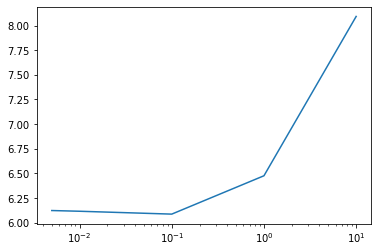

In [ ]:
# подбор гиперпараметров
parametrs = {'alpha': [0.005, 0.01, 0.1, 1, 10]}
gs = GridSearchCV(Lasso(), parametrs, cv=3, scoring='neg_mean_absolute_error')
gs.fit(X_train_sc, y_train)
plt.plot(parametrs['alpha'], -1 * gs.cv_results_['mean_test_score'])
plt.xscale('log')

In [ ]:
# лучшие параметры
model_lasso = Lasso(alpha=0.1, max_iter=2000)
cv_lasso = cross_val_score(model_lasso, X_train_sc, y_train, cv=3, scoring='neg_mean_absolute_error').mean()
cv_lasso

-6.0864036864848075

<div class="alert alert-success">
<b>👍 Успех:</b> Модель хорошо обучена. Параметры хорошо подобраны.
</div>

### Ridge

In [ ]:
model_ridge = Ridge()
cross_val_score(model_ridge, X_train_sc, y_train, cv=3, scoring='neg_mean_absolute_error').mean()

-6.128354055346292

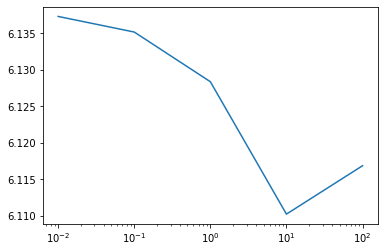

In [ ]:
# подбор гиперпараметров
parametrs = {'alpha': [0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), parametrs, cv=3, scoring='neg_mean_absolute_error')
gs.fit(X_train_sc, y_train)
plt.plot(parametrs['alpha'], -1 * gs.cv_results_['mean_test_score'])
plt.xscale('log')

In [ ]:
# лучшие параметры
model_ridge = Ridge(alpha=10)
cv_ridge = cross_val_score(model_ridge, X_train_sc, y_train, cv=3, scoring='neg_mean_absolute_error').mean()
cv_ridge

-6.110223172220561

### RandomForest

In [ ]:
model_rf = RandomForestRegressor()
cross_val_score(model_rf, X_train, y_train, cv=3, scoring='neg_mean_absolute_error').mean()

-6.151543316121628

In [ ]:
# подбор параметров
params = {'n_estimators': [10, 50, 100], 
          #'criterion': ['squared_error', 'absolute_error', 'poisson'],
          'min_samples_split': [2, 4, 6]}

gs = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_error')

In [ ]:
# лучшие параметры
model_rf = gs.best_estimator_
cv_rf = gs.best_score
cv_rf

-6.106347309337788

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Можно не обучать модель с лучшими параметрами еще раз, а взять best_score_ из GridSearchCV
</div>

<font color='Salmon'><b>Комментарий студента</b></font>

Спасибо, поправила

### Catboost

In [ ]:
model_cb = cb.CatBoostRegressor(loss_function='MAE', verbose=250)
cross_val_score(model_cb, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')

0:	learn: 8.1228476	total: 51.9ms	remaining: 51.9s
250:	learn: 4.4555219	total: 1.05s	remaining: 3.13s
500:	learn: 3.5458184	total: 2.02s	remaining: 2.01s
750:	learn: 3.0631014	total: 2.99s	remaining: 991ms
999:	learn: 2.7334166	total: 3.94s	remaining: 0us
0:	learn: 7.9645773	total: 5.06ms	remaining: 5.05s
250:	learn: 4.5246360	total: 970ms	remaining: 2.89s
500:	learn: 3.7578477	total: 1.93s	remaining: 1.92s
750:	learn: 3.3361472	total: 2.9s	remaining: 962ms
999:	learn: 3.0322241	total: 3.87s	remaining: 0us
0:	learn: 7.8473398	total: 4.66ms	remaining: 4.66s
250:	learn: 4.4791755	total: 1.01s	remaining: 3.01s
500:	learn: 3.6399874	total: 1.99s	remaining: 1.98s
750:	learn: 3.1656969	total: 2.96s	remaining: 982ms
999:	learn: 2.8760754	total: 3.94s	remaining: 0us


array([-5.91839432, -5.72666458, -5.9077411 ])

In [ ]:
# подбор параметров
params = {'learning_rate': [0.03, 0.01],
          'depth': [2, 4, 6],
          'l2_leaf_reg': [1, 3, 5, 7, 9]}

model_cb = cb.CatBoostRegressor(verbose=False)
gs = GridSearchCV(model_cb, params, cv=3, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f4fce2ec390>,
             param_grid={'depth': [2, 4, 6], 'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.03, 0.01]},
             scoring='neg_mean_absolute_error')

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Можно воспользоваться <a href = "https://catboost.ai/en/docs/concepts/python-reference_catboost_grid_search">grid_search</a> из библиотеки cat boost. Он должен работать быстрее.
</div>

In [ ]:
model_cb = gs.best_estimator_
cv_cb = gs.best_score_
cv_cb

-5.844648385797132

## Comparing

In [ ]:
pd.DataFrame([cv_lasso, cv_ridge, cv_rf, cv_cb], index=['lasso', 'ridge', 'rf', 'cb'], columns=['mean_cv_score'])

,mean_cv_score
lasso,-6.086404
ridge,-6.110223
rf,-6.106347
cb,-5.844648


Для инференса выберем катбуст

## Testing

In [ ]:
y_pred = model_cb.predict(X_test)
mae(y_pred, y_test)

5.918516409664864

<div class="alert alert-success">
<b>👍 Успех:</b> Отличный результат.
</div>

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Нужно добавить сравнение с константной моделью. Можно воспользоваться <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html">DummyRegressor</a>
</div>

## Dummy 

In [ ]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)
mae(y_test, dummy_preds)

8.129119324623002

In [ ]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)
mae(y_test, dummy_preds)

8.058419243986254

<font color='Salmon'><b>Комментарий студента</b></font>

Константная модель показывает результаты заметно хуже

<div style="background-color:MintCream; border:solid CadetBlue 2px; padding: 20px">
<b>Итоговый комментарий:</b> У тебя получился отличный проект. Очень лаконичный. Все данные правильно обработаны, модели хорошо обучены. У меня всего пара небольших замечаний:
    
* нужно вернуть в работу первую часть, которую проверял тимлид
* нужно добавить сравнение с константной моделью
   
В остальном шикарная работа.
<div>

Получили значением среднего отклонения ниже 6